# Rossmann销售预测
Kaggle项目地址：https://www.kaggle.com/c/rossmann-store-sales

## 1.数据分析

### 导入数据、

In [2]:
import py.visulization_p2 as vs
%matplotlib inline

data = vs.load_data()

### 可视化分析

array([1060,  136,  119,   35,  712])

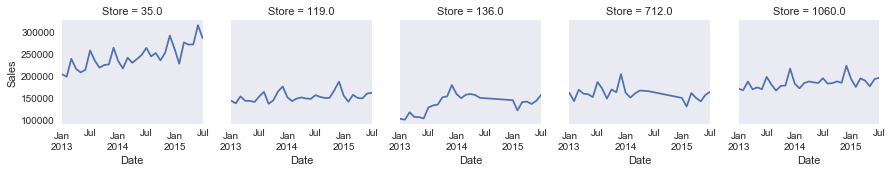

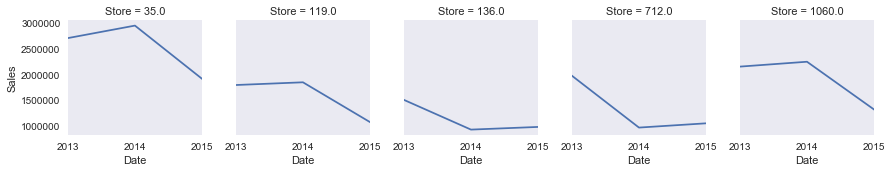

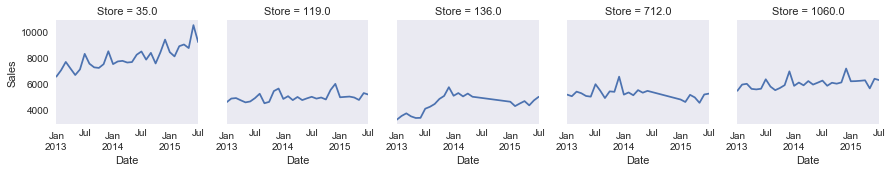

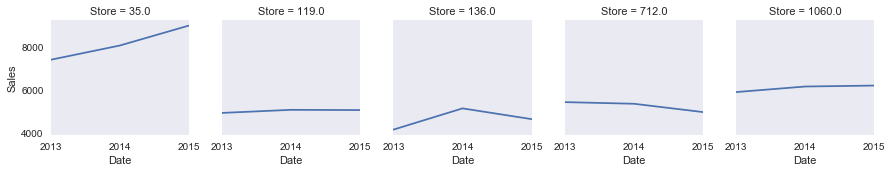

In [4]:
# Take 5 random stores to view the sales by dates, monthly & yearly view
# Monthly sum view
stores = vs.viewRandomStoreData(data,"M",'sum',size = 5)
# Yearly sum view
vs.viewStoreData(data,stores,"A",'sum')
# Monthly mean value view
vs.viewStoreData(data,stores, "M",'mean')
# Yearly mean value view
vs.viewStoreData(data,stores, "A",'mean')

## 2.基准模型

## BP神经网络的实现
### 数据预处理

In [47]:
# Load data
import py.helper as helper
import pandas as pd
import numpy as np
import datetime

# Sales Data
all_data_file = "./data/train.csv"
data = pd.read_csv(all_data_file, dtype={"StateHoliday":np.str},
                  parse_dates=['Date'])
# Format Sales data
data.drop(['DayOfWeek'],axis = 1, inplace = True)
data.fillna('0')


# Store info data
def date_parse(dates):
    #helper.debug(dates)
    date_time = str(dates).split(" ")
    #helper.debug(date_time)
    if(date_time[0] == 'nan'):
        date_time[0] = '2018'
        date_time[1] = '01'
    
    return pd.datetime.strptime("{0} {1} 01".format(date_time[0], date_time[1]),'%Y %m %d')


store_info_file = "./data/store.csv"
store_info = pd.read_csv(store_info_file, index_col = "Store", 
                         usecols = ["Store","StoreType", "Assortment","CompetitionDistance"
                                  , "CompetitionOpenSinceYear","CompetitionOpenSinceMonth"],
                         parse_dates = {'CS':['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']},
                        date_parser= date_parse)
store_info.fillna('0')


print (data[:5])
print type(data.iloc[0,1])

print store_info[:3]
print type(store_info.iloc[0,0])

grouped = data.groupby(data['Date'].apply(lambda x:x.month))
print grouped
#grouped.aggregate(np.sum)

   Store       Date  Sales  Customers  Open  Promo StateHoliday  SchoolHoliday
0      1 2015-07-31   5263        555     1      1            0              1
1      2 2015-07-31   6064        625     1      1            0              1
2      3 2015-07-31   8314        821     1      1            0              1
3      4 2015-07-31  13995       1498     1      1            0              1
4      5 2015-07-31   4822        559     1      1            0              1
<class 'pandas.tslib.Timestamp'>
              CS StoreType Assortment  CompetitionDistance
Store                                                     
1     2008-09-01         c          a               1270.0
2     2007-11-01         a          a                570.0
3     2006-12-01         a          a              14130.0
<class 'pandas.tslib.Timestamp'>


# Temp